In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly as po

In [140]:
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [141]:
df = pd.read_pickle('AgesAndHeights.pkl')
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [142]:
age = df['Age']
height = df['Height']
df = df[age>0]
ages = df['Age']

In [143]:
ages.shape

(93,)

In [144]:
df.shape

(93, 2)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

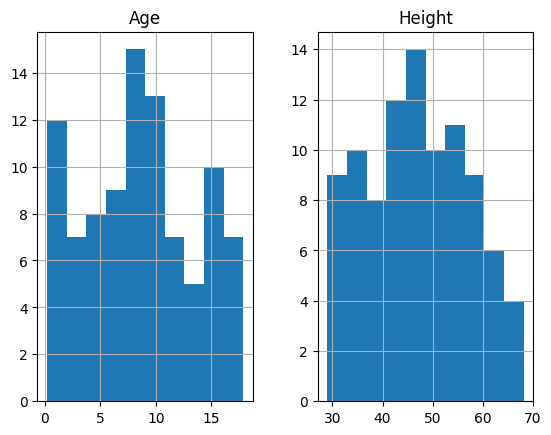

In [145]:
df.hist()

<Axes: >

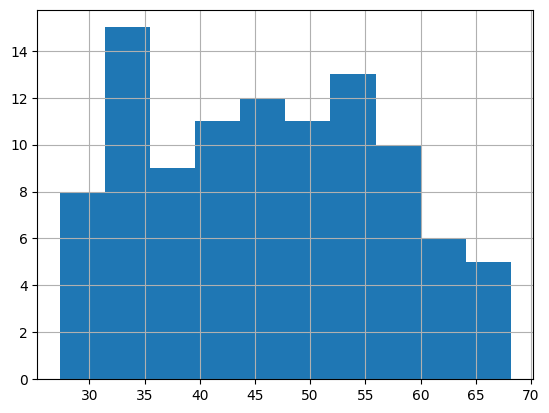

In [146]:
height.hist()

In [147]:
df.isnull().sum()

Age       0
Height    0
dtype: int64

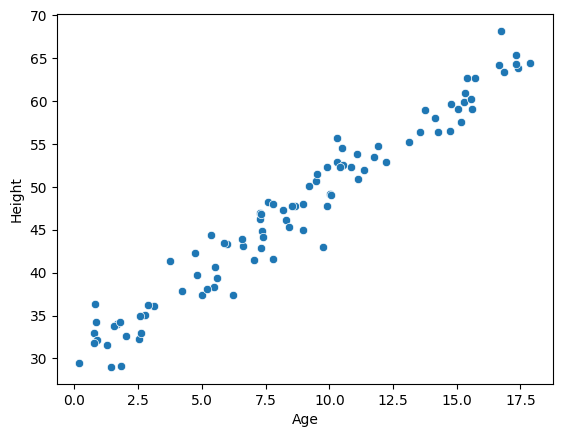

In [148]:
sns.scatterplot(x=ages,y=height)
plt.show()

In [149]:
fig = px.scatter(df,x=ages,y=df['Height'],title='Height vs age',
                 labels={'x':'age','y':'height'})
fig.show()

In [150]:
age_np = ages.to_numpy()
height_np = df['Height'].to_numpy()

In [151]:
age_np_reshape = age_np.reshape(len(ages),1)
height_np_reshape = height_np.reshape(len(height_np),1)


In [152]:
model = LinearRegression().fit(age_np_reshape,height_np)

In [153]:
model.coef_

array([2.0014169])

In [154]:
X_new = np.array(list(range(19))).reshape(19,1)
pred = model.predict(X_new)

In [155]:
fig = px.scatter(x=ages,y=df['Height'],title='Height vs age',
                 labels={'x':'age','y':'height'})

fig.add_trace(go.Scatter(x=X_new.reshape(19),y=pred,mode = 'lines',
                         name='Model'))
fig.show()

In [156]:
from joblib import dump,load

In [157]:
dump(model,'Model.joblib')

['Model.joblib']

In [158]:
model_in = load('Model.joblib')
model_in.predict(np.array([[2]]))

array([33.96469141])

In [159]:
def Make_Picture(training_data_filemane,Model,New_input_np_arr,Output_file):
    data = pd.read_pickle(training_data_filemane)
    ages = data['Age']
    data = data[ages>0]
    ages = data['Age']
    height = data['Height']
    fig = px.scatter(x=ages,y=df['Height'],title='Height vs age',
                 labels={'x':'age','y':'height'})

    fig.add_trace(go.Scatter(x=X_new.reshape(19),y=pred,mode = 'lines',
                            name='Model'))
    new_pred = model.predict(New_input_np_arr)
    fig.add_trace(go.Scatter(x=New_input_np_arr.reshape(len(New_input_np_arr)),y=new_pred,
                                                        name='New_output',
                                                        mode='markers',
                                                        marker = dict(color='purple',size=20,line=dict(color='purple',width=2))))
    fig.write_image(Output_file,width=800)
    
    fig.show()
    

In [160]:
Make_Picture('AgesAndHeights.pkl',model_in,np.array([[1],[7]]),'X.svg')

In [161]:
def Float_string_to_numpy_array(float_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    float_values = [x for x in float_str.split(',') if x.strip() and is_float(x)]
    float_array = np.array([float(x) for x in float_values])
    return float_array.reshape(len(float_array),1)

In [162]:
Float_string_to_numpy_array("1,4,6")

array([[1.],
       [4.],
       [6.]])

In [163]:
Make_Picture('AgesAndHeights.pkl',model_in,Float_string_to_numpy_array('1,3,3.5'),'X_1.svg')
